In [580]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [603]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci
def format_func_M(value, tick_number):
    # find number of multiples of pi/2
    if value % 10000000 == 0:
        value = '{:.0f}'.format(value / 1000000)
        return str(value) + "M"
    
def format_func_K(value, tick_number):
    # find number of multiples of pi/2
    if value % 1000 == 0:
        value = '{:.0f}'.format(value / 1000)
        return str(value) + "K"
    


Hypothalamus and GTEx

In [571]:
typ = 'genes' #genes or junctions

In [572]:
est_df = pd.read_csv('./estimation/hypo_' + typ, sep = ' ', header = None, index_col = 0)
est_df.columns = [typ, 'depth', 'depth_unique']
real_df = pd.read_csv('./estimation/gtex_' + typ, sep = ' ', header = None, index_col = 0)
real_df.columns = [typ, 'depth', 'depth_unique']
mean_seq_depth = real_df['depth_unique'].mean()
print(mean_seq_depth)

41281747.485436894


In [573]:
X_line, y_line, ci = polynomial_regression(est_df['depth'], est_df[typ], 2)
coef_array = np.polyfit(est_df['depth'], est_df[typ], 2)

a = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

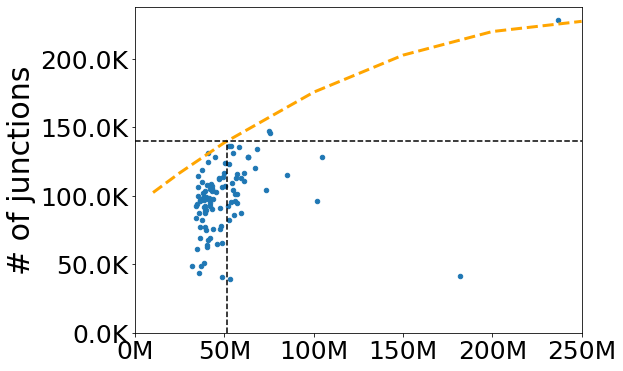

In [570]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))

real_df.plot.scatter(x='depth_unique', y=typ, ax=ax)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a,b,c,d,e,f,g], 
         c='orange', linestyle='--', linewidth=3)

plt.ylabel('# of ' + typ, size=30)
plt.xlabel('')
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylim(0,)
plt.xlim(0,250000000)

mean_seq_depth = real_df['depth_unique'].mean()
seq_depth = coef_array[0] * mean_seq_depth * mean_seq_depth + coef_array[1] * mean_seq_depth + coef_array[2]

plt.title ('')
plt.hlines(seq_depth, 0, 250000000, colors = 'black', linestyles='--')
plt.vlines(mean_seq_depth, 0, seq_depth, linestyles='--', colors='black')
plt.show()
plt.show()

In [537]:
print((f - seq_depth))
print((f - seq_depth) / f)
print(mean_seq_depth)

4635.453484093996
0.2602510705024161
41281747.485436894


In [574]:
typ = 'junctions' #genes or junctions

In [575]:
est_df = pd.read_csv('./estimation/hypo_' + typ, sep = ' ', header = None, index_col = 0)
est_df.columns = [typ, 'depth', 'depth_unique']
real_df = pd.read_csv('./estimation/gtex_' + typ, sep = ' ', header = None, index_col = 0)
real_df.columns = [typ, 'depth', 'depth_unique']

In [576]:
X_line, y_line, ci = polynomial_regression(est_df['depth'], est_df[typ], 2)
coef_array = np.polyfit(est_df['depth'], est_df[typ], 2)

a = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

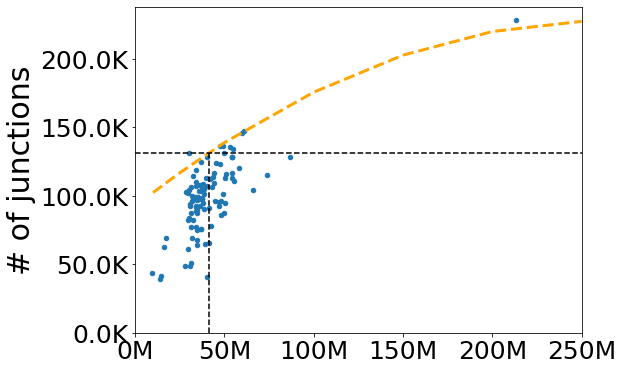

In [577]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))

real_df.plot.scatter(x='depth_unique', y=typ, ax=ax)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a,b,c,d,e,f,g], 
         c='orange', linestyle='--', linewidth=3)

plt.ylabel('# of ' + typ, size=30)
plt.xlabel('')
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylim(0,)
plt.xlim(0,250000000)

mean_seq_depth = real_df['depth_unique'].mean()
seq_depth = coef_array[0] * mean_seq_depth * mean_seq_depth + coef_array[1] * mean_seq_depth + coef_array[2]

plt.hlines(seq_depth, 0, 250000000, colors = 'black', linestyles='--')
plt.vlines(mean_seq_depth, 0, seq_depth, linestyles='--', colors='black')
plt.show()

In [579]:
print((f - seq_depth))
print((f - seq_depth) / f)
print(mean_seq_depth)

88429.58307896211
0.40225444998795373
41281747.485436894


TCGA

In [582]:
typ = 'genes' #genes or junctions

In [583]:
est_df = pd.read_csv('./estimation/hypo_' + typ, sep = ' ', header = None, index_col = 0)
est_df.columns = [typ, 'depth', 'depth_unique']

est2_df = pd.read_csv('./estimation/DCM_' + typ, sep = ' ', header = None, index_col = 0)
est2_df.columns = [typ, 'depth', 'depth_unique']

est3_df = pd.read_csv('./estimation/adipose1_' + typ, sep = ' ', header = None, index_col = 0)
est3_df.columns = [typ, 'depth', 'depth_unique']

est4_df = pd.read_csv('./estimation/adipose2_' + typ, sep = ' ', header = None, index_col = 0)
est4_df.columns = [typ, 'depth', 'depth_unique']


real_df = pd.read_csv('./tcga_' + typ, sep = ' ', header = None, index_col = 0)
real_df.columns = [typ, 'depth', 'depth_unique']

In [584]:
X_line, y_line, ci = polynomial_regression(est_df['depth'], est_df[typ], 2)
coef_array = np.polyfit(est_df['depth'], est_df[typ], 2)

a = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est2_df['depth'], est2_df[typ], 2)
coef_array = np.polyfit(est2_df['depth'], est2_df[typ], 2)

a2 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b2 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c2 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d2 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e2 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f2 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g2 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est3_df['depth'], est3_df[typ], 2)
coef_array = np.polyfit(est3_df['depth'], est3_df[typ], 2)

a3 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b3 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c3 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d3 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e3 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f3 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g3 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est4_df['depth'], est4_df[typ], 2)
coef_array = np.polyfit(est4_df['depth'], est4_df[typ], 2)

a4 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b4 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c4 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d4 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e4 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f4 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g4 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]


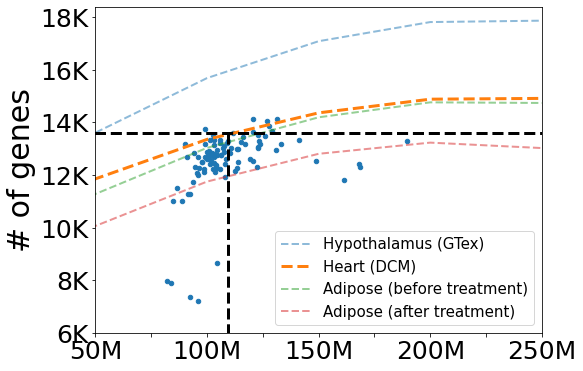

In [606]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))


real_df.plot.scatter(x='depth_unique', y=typ, ax=ax)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a,b,c,d,e,f,g],
         linestyle='--', linewidth = 2, label = 'Hypothalamus (GTex)', alpha=0.5)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a2,b2,c2,d2,e2,f2,g2],
         linestyle='--', linewidth = 3, label = 'Heart (DCM)')
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a3,b3,c3,d3,e3,f3,g3],
         linestyle='--', linewidth = 2, label = 'Adipose (before treatment)', alpha=0.5)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a4,b4,c4,d4,e4,f4,g4],
         linestyle='--', linewidth = 2, label = 'Adipose (after treatment)', alpha=0.5)
plt.legend(fontsize=15, loc = 'lower right')


plt.ylabel('# of ' + typ, size=30)
plt.xlabel('')
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylim(6000,)
plt.xlim(50000000,250000000)

X_line, y_line, ci = polynomial_regression(est2_df['depth'], est2_df[typ], 2)
coef_array = np.polyfit(est2_df['depth'], est2_df[typ], 2)

mean_seq_depth = real_df['depth_unique'].mean()
seq_depth = coef_array[0] * mean_seq_depth * mean_seq_depth + coef_array[1] * mean_seq_depth + coef_array[2]

plt.hlines(seq_depth, 0, 250000000, colors = 'black', linestyles='--', linewidth=3)
plt.vlines(mean_seq_depth, seq_depth, 0, linestyles='--', colors='black', linewidth=3)

plt.show()

In [607]:
print((f2 - seq_depth))
print((f2 - seq_depth) / f2)
print(mean_seq_depth)

1299.4901937089035
0.08733048655587797
109494599.43


In [608]:
typ = 'junctions' #genes or junctions

In [609]:
est_df = pd.read_csv('./estimation/hypo_' + typ, sep = ' ', header = None, index_col = 0)
est_df.columns = [typ, 'depth', 'depth_unique']

est2_df = pd.read_csv('./estimation/DCM_' + typ, sep = ' ', header = None, index_col = 0)
est2_df.columns = [typ, 'depth', 'depth_unique']

est3_df = pd.read_csv('./estimation/adipose1_' + typ, sep = ' ', header = None, index_col = 0)
est3_df.columns = [typ, 'depth', 'depth_unique']

est4_df = pd.read_csv('./estimation/adipose2_' + typ, sep = ' ', header = None, index_col = 0)
est4_df.columns = [typ, 'depth', 'depth_unique']

real_df = pd.read_csv('./estimation/tcga_' + typ, sep = ' ', header = None, index_col = 0)
real_df.columns = [typ, 'depth', 'depth_unique']

In [610]:
X_line, y_line, ci = polynomial_regression(est_df['depth'], est_df[typ], 2)
coef_array = np.polyfit(est_df['depth'], est_df[typ], 2)

a = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est2_df['depth'], est2_df[typ], 2)
coef_array = np.polyfit(est2_df['depth'], est2_df[typ], 2)

a2 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b2 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c2 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d2 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e2 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f2 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g2 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est3_df['depth'], est3_df[typ], 2)
coef_array = np.polyfit(est3_df['depth'], est3_df[typ], 2)

a3 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b3 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c3 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d3 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e3 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f3 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g3 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]

X_line, y_line, ci = polynomial_regression(est4_df['depth'], est4_df[typ], 2)
coef_array = np.polyfit(est4_df['depth'], est4_df[typ], 2)

a4 = coef_array[0] * 10000000 * 10000000 + coef_array[1] * 10000000 + coef_array[2]
b4 = coef_array[0] * 25000000 * 25000000 + coef_array[1] * 25000000 + coef_array[2]
c4 = coef_array[0] * 50000000 * 50000000 + coef_array[1] * 50000000 + coef_array[2]
d4 = coef_array[0] * 100000000 * 100000000 + coef_array[1] * 100000000 + coef_array[2]
e4 = coef_array[0] * 150000000 * 150000000 + coef_array[1] * 150000000 + coef_array[2]
f4 = coef_array[0] * 200000000 * 200000000 + coef_array[1] * 200000000 + coef_array[2]
g4 = coef_array[0] * 250000000 * 250000000 + coef_array[1] * 250000000 + coef_array[2]


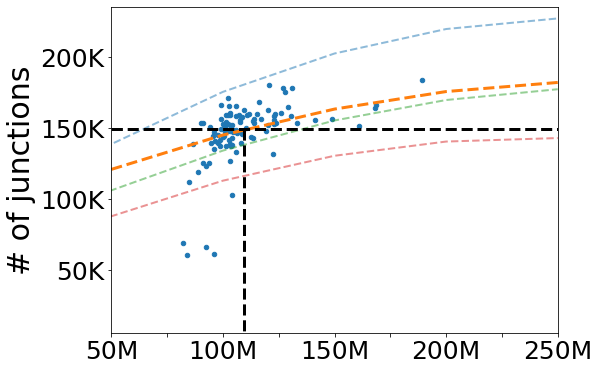

In [612]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))


real_df.plot.scatter(x='depth_unique', y=typ, ax=ax)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a,b,c,d,e,f,g],
         linestyle='--', linewidth = 2, label = 'Hypothalamus (GTex)', alpha=0.5)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a2,b2,c2,d2,e2,f2,g2],
         linestyle='--', linewidth = 3, label = 'Heart (DCM)')
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a3,b3,c3,d3,e3,f3,g3],
         linestyle='--', linewidth = 2, label = 'Adipose (before treatment)', alpha=0.5)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a4,b4,c4,d4,e4,f4,g4],
         linestyle='--', linewidth = 2, label = 'Adipose (after treatment)', alpha=0.5)
#plt.legend(fontsize=15, loc = 'lower right')


plt.ylabel('# of ' + typ, size=30)
plt.xlabel('')
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylim(6000,)
plt.xlim(50000000,250000000)

X_line, y_line, ci = polynomial_regression(est2_df['depth'], est2_df[typ], 2)
coef_array = np.polyfit(est2_df['depth'], est2_df[typ], 2)

mean_seq_depth = real_df['depth_unique'].mean()
seq_depth = coef_array[0] * mean_seq_depth * mean_seq_depth + coef_array[1] * mean_seq_depth + coef_array[2]

plt.hlines(seq_depth, 0, 250000000, colors = 'black', linestyles='--', linewidth=3)
plt.vlines(mean_seq_depth, seq_depth, 0, linestyles='--', colors='black', linewidth=3)

plt.show()

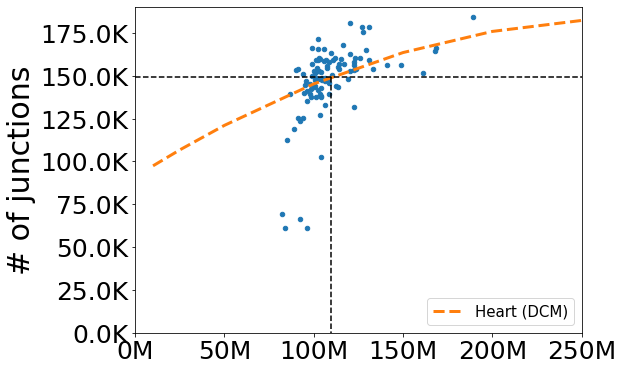

In [561]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func_M))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))


real_df.plot.scatter(x='depth_unique', y=typ, ax=ax)
plt.plot([10000000, 25000000, 50000000, 100000000, 150000000, 200000000, 250000000],[a2,b2,c2,d2,e2,f2,g2],
         linestyle='--', linewidth = 3, c = '#ff7f0e', label = 'Heart (DCM)')
plt.legend(fontsize=15, loc = 'lower right')


plt.ylabel('# of ' + typ, size=30)
plt.xlabel('')
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylim(0,)
plt.xlim(0,250000000)

X_line, y_line, ci = polynomial_regression(est2_df['depth'], est2_df[typ], 2)
coef_array = np.polyfit(est2_df['depth'], est2_df[typ], 2)

mean_seq_depth = real_df['depth_unique'].mean()
seq_depth = coef_array[0] * mean_seq_depth * mean_seq_depth + coef_array[1] * mean_seq_depth + coef_array[2]


plt.hlines(seq_depth, 0, 250000000, colors = 'black', linestyles='--')
plt.vlines(mean_seq_depth, seq_depth, 0, linestyles='--', colors='black')
plt.show()

In [562]:
print((f2 - seq_depth))
print((f2 - seq_depth) / f2)
print(mean_seq_depth)

26668.575098770205
0.15168449332454953
109494599.43
